In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
dark_patterns = pd.read_csv('dark-patterns.csv')

print(dark_patterns)

                                         Pattern String  \
0     Collin P. from Grandview Missouri just bought ...   
1     Faith in Glendale, United States purchased a C...   
2     Sharmeen Atif From Karachi just bought Stylish...   
3                            9 people are viewing this.   
4              5338 people viewed this in the last hour   
...                                                 ...   
1813                                     $132.90 $99.00   
1814   This offer is only VALID if you add to cart now!   
1815                                                NaN   
1816                                                NaN   
1817                          Save $148.98AUD – 49% Off   

                                                Comment Pattern Category  \
0                                        Periodic popup     Social Proof   
1                                        Periodic popup     Social Proof   
2                                        Periodic popup     Soc

In [46]:
print(dark_patterns['Pattern Type'].value_counts())

Low-stock Message                   632
Countdown Timer                     393
Activity Notification               313
Confirmshaming                      169
Limited-time Message                 88
Pressured Selling                    67
High-demand Message                  47
Hard to Cancel                       31
Visual Interference                  25
Hidden Subscription                  14
Testimonials of Uncertain Origin     12
Trick Questions                       9
Sneak into Basket                     7
Forced Enrollment                     6
Hidden Costs                          5
Name: Pattern Type, dtype: int64


In [47]:
dark_patterns = dark_patterns[dark_patterns['Pattern String'].notna()]

dark_patterns = dark_patterns[dark_patterns['Where in website?'] == 'Product Page']
dark_patterns.drop_duplicates(subset ="Pattern String", keep = False, inplace = True) 


In [48]:
print(dark_patterns['Pattern Type'].value_counts())

Low-stock Message                   325
Activity Notification               303
Confirmshaming                      113
Countdown Timer                      90
Limited-time Message                 72
Pressured Selling                    33
High-demand Message                  12
Visual Interference                   8
Hidden Subscription                   4
Sneak into Basket                     2
Trick Questions                       2
Forced Enrollment                     1
Hard to Cancel                        1
Testimonials of Uncertain Origin      1
Name: Pattern Type, dtype: int64


In [49]:
dark_patterns.drop_duplicates(subset ="Pattern String", keep = False, inplace = True) 
print(dark_patterns['Pattern String'].value_counts())

Last chance! Only 1 left                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1
limited availability at this price!                                                                                                                                                                                                                                                                                                                               

In [50]:
print(dark_patterns['Pattern Type'].value_counts())

Low-stock Message                   325
Activity Notification               303
Confirmshaming                      113
Countdown Timer                      90
Limited-time Message                 72
Pressured Selling                    33
High-demand Message                  12
Visual Interference                   8
Hidden Subscription                   4
Sneak into Basket                     2
Trick Questions                       2
Forced Enrollment                     1
Hard to Cancel                        1
Testimonials of Uncertain Origin      1
Name: Pattern Type, dtype: int64


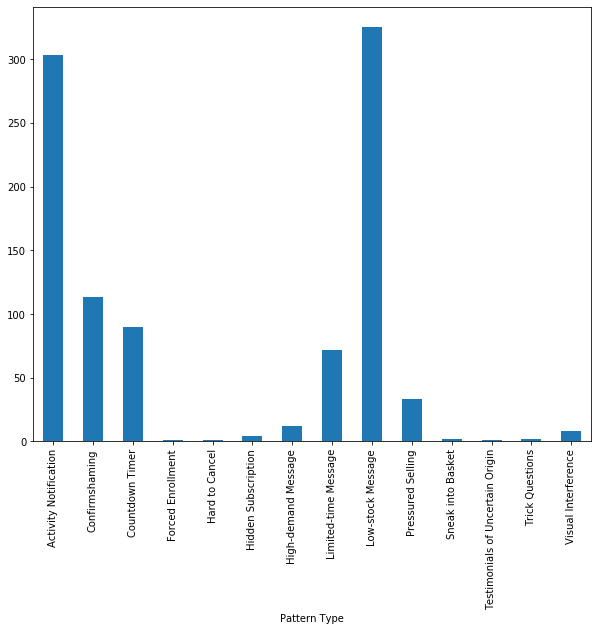

In [51]:
fig = plt.figure(figsize=(10,8))
dark_patterns.groupby('Pattern Type')['Pattern String'].count().plot.bar(ylim=0)
plt.show()

In [52]:
pd.set_option('display.max_rows', dark_patterns.shape[0]+1)

dark_patterns['Pattern String']
len(dark_patterns)
print(dark_patterns['Pattern String'])

0       Collin P. from Grandview Missouri just bought ...
1       Faith in Glendale, United States purchased a C...
2       Sharmeen Atif From Karachi just bought Stylish...
3                              9 people are viewing this.
4                5338 people viewed this in the last hour
5       Keith in Champaign, Illinois bought Mini USB A...
6       Jamie from Eloy United States purchased a CBD ...
7       Someone in Kilwinning, United Kingdom just bou...
8       Chelsea in Burlington, Wisconsin bought Take O...
9       Crystal Li in Flushing, United States purchased a
10                       🔥 2 people are looking right now
11                   3 people bought this item last week.
12                31 people seeing this product right now
13      Ken in Oakland, United States purchased a Drea...
14                        19 people have viewed this item
15      Rebecca in Buffalo just bought Sateen Twill Sw...
16      Someone from Menlo Park, California just purch...
17            

In [53]:
print(len(dark_patterns['Pattern String']))
newPatternString= []
newPatternType= []
for i in dark_patterns['Pattern String']:
    newPatternString.append(i)
for i in dark_patterns['Pattern Type']:
    newPatternType.append(i)
print(len(newPatternType))
print(len(newPatternString))


967
967
967


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
i=0
while i <len(newPatternString):
    vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                              
    tfidf = vect.fit_transform(newPatternString)                                                                                                                                                                                                                  
    pairwise_similarity = tfidf * tfidf.T

    arr = pairwise_similarity.toarray()     
    np.fill_diagonal(arr, np.nan)
    input_doc = newPatternString[i]                                                                                                                                                                                                  
    input_idx = newPatternString.index(input_doc)  
    result_idx = np.nanargmax(arr[input_idx])   
    beforeCurrentIndex=0
    indexNeedDel=[]
    for j in range(0,len(arr[input_idx])):
        if(j!=i):
            if(arr[input_idx][j]>0.9):
                if(j<i):
                    beforeCurrentIndex=beforeCurrentIndex+1
                print(newPatternString[j],"--------",newPatternString[i])
                indexNeedDel.append(j)
    for k in indexNeedDel:
        del newPatternString[k]
        del newPatternType[k]
    
    i=i+1-beforeCurrentIndex
print(len(newPatternString))

🔥 9 people are viewing this. -------- 9 people are viewing this.
3 PEOPLE VIEWING -------- 9 people are viewing this.
2 people are viewing this -------- 9 people are viewing this.
2 people are looking right now -------- 🔥 2 people are looking right now
3 people are looking at this item right now -------- 🔥 2 people are looking right now
4 people are looking at this right now. -------- 🔥 2 people are looking right now
9 sold in last 4 hours -------- 4 sold in last 5 hours
🔥👁️ 1 person is viewing this. -------- 1 person is viewing this
7 sold in last 24 hours -------- 24 sold in last 24 hours.
9 people are viewing this. -------- 3 PEOPLE VIEWING
2 people are viewing this -------- 3 PEOPLE VIEWING
🔥 2 people are looking right now -------- 3 people are looking at this item right now
4 people are looking at this right now. -------- 3 people are looking at this item right now
3 PEOPLE VIEWING -------- 2 people are viewing this
3 other people are currently viewing this item. -------- 1 people

10 Left in stock -------- Less than 10 left in stock
Only 10 left in stock -------- Less than 10 left in stock
HURRY! ONLY 2 LEFT IN STOCK! -------- HURRY! Only a few left in stock!
HURRY ONLY 9 LEFT IN STOCK! -------- HURRY! Only a few left in stock!
Hurry! Only 3 Left In Stock. -------- HURRY! Only a few left in stock!
Hurry, only 2 left in stock! -------- HURRY! Only a few left in stock!
HURRY! 3 left in stock! -------- HURRY! Only a few left in stock!
1 left in stock. Hurry! -------- HURRY! Only a few left in stock!
Hurry! Only 6 left in stock -------- HURRY! Only a few left in stock!
Hurry! Only 2 left in stock! -------- HURRY! Only a few left in stock!
Hurry! Only 1 Left In Stock -------- HURRY! Only a few left in stock!
Hurry, only 1 left in stock! -------- HURRY! Only a few left in stock!
Hurry! Only 2 left in stock -------- HURRY! Only a few left in stock!
Hurry, only 2 left in stock -------- HURRY! Only a few left in stock!
Hurry up! Only 4 left in stock -------- HURRY! Only 

ONLY 3 LEFT! GET IT NOW! -------- Only 1 Left !
Only 1 left. -------- Only 1 Left !
(Only 5 Left) -------- Only 1 Left !
3 left -------- Only 1 Left !
Only 2 left. -------- Only 1 Left !
Only 8 Left! -------- Only 1 Left !
Only 4 left! -------- Only 1 Left !
Only 3 Left -------- Only 1 Left !
Only a few left! -------- Only 1 Left !
2 left -------- Only 1 Left !
Only 5 left! -------- Only 1 Left !
(only 5 left) -------- Only 1 Left !
Hurry only 1 left! -------- Hurry, only a few left!
Hurry, only 5 left -------- Hurry, only a few left!
Only 1 Left ! -------- Only 1 left.
(Only 5 Left) -------- Only 1 left.
3 left -------- Only 1 left.
Only 8 Left! -------- Only 1 left.
Only 4 left! -------- Only 1 left.
Only 3 Left -------- Only 1 left.
Only a few left! -------- Only 1 left.
2 left -------- Only 1 left.
Only 5 left! -------- Only 1 left.
Only 1 left in stock. -------- 1 left in stock
Only 3 left In Stock -------- 1 left in stock
Only 1 left in Stock -------- 1 left in stock
ONLY 1 LEFT 

In [55]:
# remove all symbol
import re
for i in range(0,len(newPatternString)):
    newPatternString[i]=re.sub('[\d$!@#%&:)(*+?./\-<">,]+', '', newPatternString[i]) 

    
forbiddenwords = re.compile('free|ship') 



for i in range(0,len(newPatternString)):
    if re.search(forbiddenwords,newPatternString[i]): print(newPatternString[i])
   


No thanks I don't like getting free stuff
No thank you I prefer to pay for shipping
No thanks I don't want a free gift
No thanks I don't like free things
There is no commitment and no minimum to buy Please note exact shipment times may vary To customize this program or future shipments call customer service anytime at THICKEN 
Enjoy FREE shipping with WSJwine Advantage
Ends Sunday  off any mattress  free shipping  free returns
You choose just one box or a  Madison Reed Membership
Order without free membership 


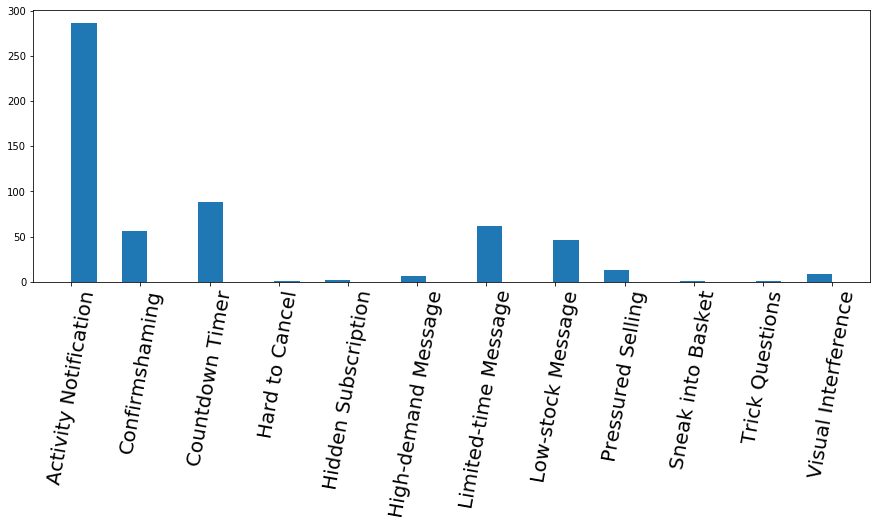

Activity Notification  ->  287
Confirmshaming  ->  56
Countdown Timer  ->  88
Hard to Cancel  ->  1
Hidden Subscription  ->  2
High-demand Message  ->  6
Limited-time Message  ->  62
Low-stock Message  ->  46
Pressured Selling  ->  13
Sneak into Basket  ->  1
Trick Questions  ->  1
Visual Interference  ->  8


In [70]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(newPatternType, bins=30)
plt.ylim(0)
ax.tick_params(axis='x', rotation=80,labelsize=20)
plt.show()

import collections 

def CountFrequency(arr): 
    return collections.Counter(arr)   
  
freq = CountFrequency(newPatternType) 

for key, value in freq.items(): 
    print(key," -> ", value)

In [57]:
len(dark_patterns)

967

In [58]:
corpus=dark_patterns['Pattern String']
corpus=corpus.tolist()

vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                              
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                  
pairwise_similarity = tfidf * tfidf.T

arr = pairwise_similarity.toarray()     
np.fill_diagonal(arr, np.nan)
input_doc = "1 day 08:15:25"                                                                                                                                                                                                  
input_idx = corpus.index(input_doc)  
input_idx                                                                                                                                                                                                                                                
result_idx = np.nanargmax(arr[input_idx])                                                                                                                                                                                                            
print(arr[input_idx])
# corpus[result_idx]  
for i in range(0,len(arr[input_idx]-1)):
    if(arr[input_idx][i]>0.9):
        print(arr[input_idx][i],i)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.11988115 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.12556516 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.23116088
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [59]:
newPatternString
i=0
for i in range(0,len(newPatternType)):
    if(newPatternType[i]=="Hard to Cancel"):
        print(newPatternString[i])

There is no commitment and no minimum to buy Please note exact shipment times may vary To customize this program or future shipments call customer service anytime at THICKEN 


In [60]:
i=0
for i in range(0,len(newPatternType)):
    if(newPatternType[i]=="Limited-time Message"):
        print(newPatternString[i])
        print(i)

Sale ends soon
443
 Limited Time Offer \nFREE\nTLPWR Test Leads
444
Here for a limited time  Red Bottle Sticker w Adam's Logo
445
LIMITED TIME BLOW OUT SALE UP TO  OFF  BEST PRICE GUARANTEE
446
FREE SHIPPING FOR A LIMITED TIME | PRICES ARE IN USD AND INCLUDE ALL IMPORT DUTIES
447
Flash Sale Alert You can now buy Utorch Corridor Porch Aisle Lights from Gearbestcom for only   off Hurry up limited time offer
448
LIMITED TIME  BUY THE NEW PURPLE PLUSH PILLOW GET ONE FREE
449
Now  off  hurry limited time offer
450
LIMITED TIME DEAL
451
LIMITED TIME SALE
452
ONLY AVAILABLE FOR A LIMITED TIME
453
 OFF for Limited Time Only
454
Only available for a LIMITED TIME so get yours TODAY
455
LIMITED TIME OFFER FREE SHIPPING OVER   FREE RETURNS
456
Ends Sunday  off any mattress  free shipping  free returns
457
Act now and save  Limited time only
458
For a limited time buy  Hydroxycut Hardcore Elite  Servings for 
459
LIMITED TIME OFFER TORSION GUN HOLSTER SUPER COMBO
460
ON SALE AT  FOR A LIMITED TIME


In [61]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np

In [62]:
x_train=[]
x_label=[]
count =0
for i in range(0,len(newPatternType)):
    if(newPatternType[i]=="Activity Notification"):
        if(count>100):
            break
        x_train.append(newPatternString[i])
        x_label.append("Activity")
for i in range(0,100):
    x_train.append("What people are saying about us")
    x_label.append("Testimonials")
count=0
for i in range(0,len(newPatternType)):
    if(newPatternType[i]=="Countdown Timer"):
        if(count>100):
            break
        x_train.append(newPatternString[i])
        x_label.append("Countdown Timer")

In [63]:
from sklearn.pipeline import Pipeline
test=["Someone in Paris, France just purchased a Kanpeki Knife Set",
     "Your cart is reserved for 09:35 minutes",
      "people are saying about us"
     ]

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer(stop_words="english")),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
])
text_clf.fit(x_train, x_train)
predicted = text_clf.predict(test)
print(predicted)

['Someone in Paris France just purchased a Kanpeki Knife Set'
 'Your order is reserved for  minutes' 'What people are saying about us']


In [64]:




remove_item=["Testimonials of Uncertain Origin","Forced Enrollment","Hidden Costs","Sneak into Basket","Hard to Cancel","Trick Questions","Hidden Subscription"]
i=0
while i <len(newPatternType):
    if(newPatternType[i] in remove_item):
        del newPatternString[i]
        del newPatternType[i]
    i=i+1


np.save('PatternString.npy', newPatternString)
np.save('PatternLabel.npy', newPatternType)

freq = CountFrequency(newPatternType) 
for key, value in freq.items(): 
    print(key," -> ", value)

Activity Notification  ->  287
Confirmshaming  ->  56
Countdown Timer  ->  88
Hard to Cancel  ->  1
Hidden Subscription  ->  2
High-demand Message  ->  6
Limited-time Message  ->  62
Low-stock Message  ->  46
Pressured Selling  ->  13
Sneak into Basket  ->  1
Trick Questions  ->  1
Visual Interference  ->  8


In [65]:

# combination of random oversampling and undersampling for imbalanced classification
from numpy import mean
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN

vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                              
tfidf = vect.fit_transform(newPatternString) 
pipe = make_pipeline(SMOTEENN(random_state=0, sampling_strategy='auto'),(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)))

# pipe=make_pipeline(SMOTEENN(random_state=0),classifier=)
pipe.fit(tfidf,newPatternType)
test=["Special sale ends in"]
X_new_counts = vect.transform(test)
print(pipe.predict(X_new_counts))
# model = SGDClassifier(loss='hinge', penalty='l2',
#                            alpha=1e-3, random_state=42,
#                            max_iter=5, tol=None)
# resample = SMOTEENN()
smote= SMOTEENN(random_state=0, sampling_strategy='auto')
X_res, y_res=smote.fit_resample(tfidf,newPatternType)

from collections import Counter
print(Counter(y_res)["Hard to Cancel"])

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

In [ ]:
test=["Someone in Paris, France just purchased a Kanpeki Knife Set",
     "Your cart is reserved for 09:35 minutes",
      "people are saying about us"
     ]

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
     ('vect', CountVectorizer(stop_words="english")),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
])
# text_clf.fit(X_res, y_res)
# predicted = text_clf.predict(test)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_res, y_res)

tf_vectorizer = CountVectorizer() # or term frequency
tfidf_transformer = TfidfTransformer()
X_new_counts = tf_vectorizer.transform(test)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)


clf.predict(X_new_tfidf)

In [ ]:
pipe.predict("Your order is reserved for 29:52 minutes")

In [ ]:
print("Hard to Cancel",Counter(y_res)["Hard to Cancel"])
print("Hidden Subscription",Counter(y_res)["Hidden Subscription"])
print("High-demand Message",Counter(y_res)["High-demand Message"])
print("Low-stock Message",Counter(y_res)["Low-stock Message"])
print("Pressured Selling",Counter(y_res)["Pressured Selling"])
print("Trick Questions",Counter(y_res)["Trick Questions"])
print("Visual Interference",Counter(y_res)["Visual Interference"])
print("Limited-time Message",Counter(y_res)["Limited-time Message"])
print("Confirmshaming",Counter(y_res)["Confirmshaming"])
print("Countdown Timer",Counter(y_res)["Countdown Timer"])
print("Activity Notification",Counter(y_res)["Activity Notification"])

In [ ]:
freq = CountFrequency(newPatternType) 

for key, value in freq.items(): 
    print(key,"->", value)

In [ ]:
PatternLabel = np.load('PatternLabel.npy').tolist()
PatternString = np.load('PatternString.npy').tolist()
print(len(PatternLabel))
print(len(PatternString))

In [ ]:
import re 
  
import re 
  
# initialising string 
ini_string = "123abcj-w:$,*+)(\" .@! eiw"
  
# printing initial string 
print ("initial string : ", ini_string) 
  
# function to demonstrate removal of characters 
# which are not numbers and alphabets using re 
  
result = re.sub('[\d$!@#%&:)(*+?./\-<">,]+', '', ini_string) 
  
# printing final string 
print ("final string", result) 

In [9]:
x=6000000
for i in range(0,24):
    x=x+x*4.75/100
print(x)

18274605.46769517
